In [13]:
import pandas as pd 

data1 = pd.read_csv('mapkickstarter/MasterKickstarter.csv')
data1.head()

,Unnamed: 0,X1,X1_1,Country,City,id,name,blurb,goal,pledged,...,Backers_as_Prct_of_Pop_YM,Backers_as_Prct_of_Pop_Y,Days_spent_making_campign,Days_inception_to_Deadline,Backers_in_city_Y,Backers_in_city_YM,All_Time_Backers_city,Mean_Pledge_City,Mean_pledge_city_Y,Mean_pledge_city_YM
0,1,1,1,AUS,Adelaide,1337161279,"Worlds & Creatures, the Art of Anthony Christou",A 100 page Artbook featuring the work of Antho...,5000.0,16081.00,...,0.020015,0.044034,21,59,473,215,1672,3124.0,2975.532222,215.0
1,2,2,2,AUS,Adelaide,1533913565,Pheonician Entertainment Productions,"Wordsmith! The story of good vs Evil, Hero vs ...",5500.0,257.00,...,0.000465,0.044034,22,62,473,5,1672,3124.0,2975.532222,2.5
2,3,3,3,AUS,Adelaide,1666009607,The Postnatalist - Second issue comic book,The Postnatalist explores feminist issues invo...,300.0,353.12,...,0.000838,0.000931,3,48,10,9,1672,3124.0,94.440000,4.5
3,4,4,4,AUS,Adelaide,1759296231,Alkandros: Futurewear 3000 Square Sunglasses; ...,Alkandros Designs is interested in being diffe...,5000.0,90.00,...,0.000279,0.044034,84,144,473,3,1672,3124.0,2975.532222,3.0
4,5,5,5,AUS,Adelaide,458085213,School of the Road: Autism and Adventure Docum...,A feature length documentary and educational s...,100000.0,16272.56,...,0.009310,0.044034,68,103,473,100,1672,3124.0,2975.532222,100.0


In [14]:
data1.columns

Index(['Unnamed: 0', 'X1', 'X1_1', 'Country', 'City', 'id', 'name', 'blurb',
       'goal', 'pledged', 'status', 'slug', 'disable_communication',
       'currency', 'currency_symbol', 'currency_trailing_code', 'deadline',
       'state_changed_at', 'created_at', 'launched_at', 'staff_pick',
       'backers_count', 'deadlineTime', 'state_changed_atTime',
       'created_atTime', 'launched_atTime', 'Categories', 'spotLight',
       'pledgedUSD', 'Ex_USd', 'deadlineYM', 'state_changed_atYM',
       'created_atYM', 'launched_atYM', 'deadlineY', 'state_changed_atY',
       'created_atY', 'launched_atY', 'Pledge_per_person', 'Prct_goal',
       'Length_of_kick', 'City_Pop', 'Latitude', 'Longitude', 'County',
       'State', 'Backers_as_Prct_of_Pop', 'Backers_as_Prct_of_Pop_YM',
       'Backers_as_Prct_of_Pop_Y', 'Days_spent_making_campign',
       'Days_inception_to_Deadline', 'Backers_in_city_Y', 'Backers_in_city_YM',
       'All_Time_Backers_city', 'Mean_Pledge_City', 'Mean_pledge_city_Y',

In [15]:
data1['currency_symbol'].unique()

array(['$', '<U+0080>', 'Fr', 'kr', '<U+00A3>', '<U+00A5>'], dtype=object)

In [16]:
data1 = data1.drop(['Unnamed: 0', 'X1', 'X1_1', 'currency_symbol', 'currency_trailing_code', 'deadline', 'state_changed_at', 'created_at', 'launched_at', 'deadlineYM', 'state_changed_atYM', 'created_atYM', 'launched_atYM', 'deadlineY', 'state_changed_atY', 'created_atY', 'launched_atY'], axis = 1)
data1.head()

,Country,City,id,name,blurb,goal,pledged,status,slug,disable_communication,...,Backers_as_Prct_of_Pop_YM,Backers_as_Prct_of_Pop_Y,Days_spent_making_campign,Days_inception_to_Deadline,Backers_in_city_Y,Backers_in_city_YM,All_Time_Backers_city,Mean_Pledge_City,Mean_pledge_city_Y,Mean_pledge_city_YM
0,AUS,Adelaide,1337161279,"Worlds & Creatures, the Art of Anthony Christou",A 100 page Artbook featuring the work of Antho...,5000.0,16081.00,successful,worlds-and-creatures-the-art-of-anthony-christou,False,...,0.020015,0.044034,21,59,473,215,1672,3124.0,2975.532222,215.0
1,AUS,Adelaide,1533913565,Pheonician Entertainment Productions,"Wordsmith! The story of good vs Evil, Hero vs ...",5500.0,257.00,failed,pheonician-entertainment-productions,False,...,0.000465,0.044034,22,62,473,5,1672,3124.0,2975.532222,2.5
2,AUS,Adelaide,1666009607,The Postnatalist - Second issue comic book,The Postnatalist explores feminist issues invo...,300.0,353.12,successful,the-postnatalist-second-issue-comic-book,False,...,0.000838,0.000931,3,48,10,9,1672,3124.0,94.440000,4.5
3,AUS,Adelaide,1759296231,Alkandros: Futurewear 3000 Square Sunglasses; ...,Alkandros Designs is interested in being diffe...,5000.0,90.00,failed,alkandros-futurewear-3000-square-sunglasses-be...,False,...,0.000279,0.044034,84,144,473,3,1672,3124.0,2975.532222,3.0
4,AUS,Adelaide,458085213,School of the Road: Autism and Adventure Docum...,A feature length documentary and educational s...,100000.0,16272.56,live,school-of-the-road-autism-and-adventure-docume...,False,...,0.009310,0.044034,68,103,473,100,1672,3124.0,2975.532222,100.0


In [17]:
data1.columns

Index(['Country', 'City', 'id', 'name', 'blurb', 'goal', 'pledged', 'status',
       'slug', 'disable_communication', 'currency', 'staff_pick',
       'backers_count', 'deadlineTime', 'state_changed_atTime',
       'created_atTime', 'launched_atTime', 'Categories', 'spotLight',
       'pledgedUSD', 'Ex_USd', 'Pledge_per_person', 'Prct_goal',
       'Length_of_kick', 'City_Pop', 'Latitude', 'Longitude', 'County',
       'State', 'Backers_as_Prct_of_Pop', 'Backers_as_Prct_of_Pop_YM',
       'Backers_as_Prct_of_Pop_Y', 'Days_spent_making_campign',
       'Days_inception_to_Deadline', 'Backers_in_city_Y', 'Backers_in_city_YM',
       'All_Time_Backers_city', 'Mean_Pledge_City', 'Mean_pledge_city_Y',
       'Mean_pledge_city_YM'],
      dtype='object')

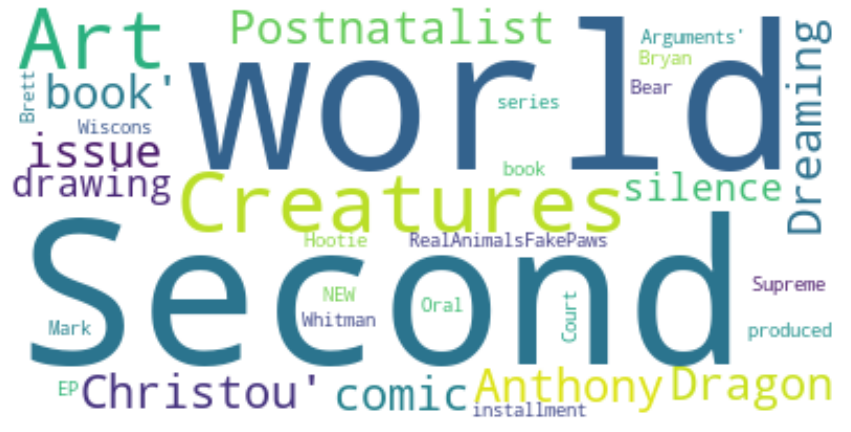

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

successful_name = data1[data1.status == 'successful']['name'].values
wordcloud = WordCloud(background_color='white').generate(str(successful_name))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

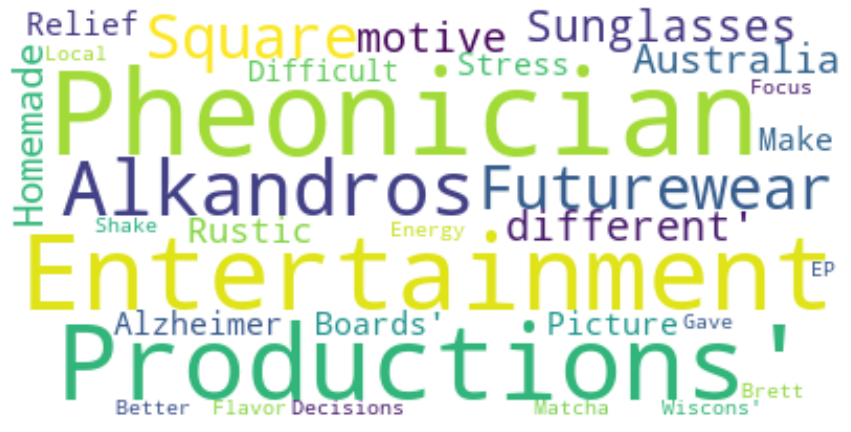

In [39]:
failure_name = data1[data1.status == 'failed']['name'].values
wordcloud1 = WordCloud(background_color='white').generate(str(failure_name))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

In [4]:
df

,Unnamed: 0,X1,X1_1,Country,City,id,name,blurb,goal,pledged,...,Backers_as_Prct_of_Pop_YM,Backers_as_Prct_of_Pop_Y,Days_spent_making_campign,Days_inception_to_Deadline,Backers_in_city_Y,Backers_in_city_YM,All_Time_Backers_city,Mean_Pledge_City,Mean_pledge_city_Y,Mean_pledge_city_YM
0,1,1,1,AUS,Adelaide,1337161279,"Worlds & Creatures, the Art of Anthony Christou",A 100 page Artbook featuring the work of Antho...,5000.0,16081.00,...,0.020015,0.044034,21,59,473,215,1672,3124.000000,2975.532222,215.0
1,2,2,2,AUS,Adelaide,1533913565,Pheonician Entertainment Productions,"Wordsmith! The story of good vs Evil, Hero vs ...",5500.0,257.00,...,0.000465,0.044034,22,62,473,5,1672,3124.000000,2975.532222,2.5
2,3,3,3,AUS,Adelaide,1666009607,The Postnatalist - Second issue comic book,The Postnatalist explores feminist issues invo...,300.0,353.12,...,0.000838,0.000931,3,48,10,9,1672,3124.000000,94.440000,4.5
3,4,4,4,AUS,Adelaide,1759296231,Alkandros: Futurewear 3000 Square Sunglasses; ...,Alkandros Designs is interested in being diffe...,5000.0,90.00,...,0.000279,0.044034,84,144,473,3,1672,3124.000000,2975.532222,3.0
4,5,5,5,AUS,Adelaide,458085213,School of the Road: Autism and Adventure Docum...,A feature length documentary and educational s...,100000.0,16272.56,...,0.009310,0.044034,68,103,473,100,1672,3124.000000,2975.532222,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99031,99032,99032,99032,USA,Zionsville,552420777,Tabletop Football--Best NEW Tailgating Game fo...,Patented tilting table technology makes this g...,55000.0,1179.00,...,0.080573,0.904208,261,291,101,9,237,2898.166667,1300.000000,9.0
99032,99033,99033,99033,USA,Zionsville,1440580627,NEW EP by Brett Wiscons - produced by Mark Bry...,"It's been a long time coming, but I'm finally ...",8400.0,11130.00,...,0.760967,0.760967,75,108,85,85,237,2898.166667,11130.000000,85.0
99033,99034,99034,99034,USA,Zionsville,1578043977,Alzheimer's Stress Relief: How to Make Difficu...,A practical guide to help caregivers make the ...,3000.0,586.00,...,0.116383,0.456580,9,39,51,13,237,2898.166667,1179.500000,13.0
99034,99035,99035,99035,USA,Zionsville,1664889418,The Local Flavor EP by Brett Wiscons,Indiana's Brett Wiscons is back with his third...,3150.0,530.00,...,0.098478,0.904208,12,32,101,11,237,2898.166667,1300.000000,11.0


In [2]:
data2 = pd.read_csv('mapkickstarter/Mapping.csv')
data2.head()

,State,Mean Campaign USD,Projects Per,Mean Bakers,Total Pledged,Total Backers,Mean Days Building,Median Percent of Goal
0,Alabama,"4,089.05",440,61.2,"1,799,183","26,932",44,3.6
1,Arizona,"10,916.01","2,166",104.6,"23,644,468","226,552",45,9.5
2,Arkansas,"3,930.71",372,46.3,"1,462,225","17,231",35,3.9
3,California,"21,572.54","15,694",215.5,"338,559,439","3,382,025",52,31.3
4,Colorado,"10,093.50","2,527",142.5,"25,506,277","360,046",46,17.4


In [3]:
data3 = pd.read_csv('mapkickstarter/County.csv')
data3.head()

,Unnamed: 0,subregion,region,TotalBackers,MeanBackers,MedianBackers,MeanUSD,TotalUSD,MedianUSD
0,1,acadia,louisiana,0,0.000000,0.0,0.000000,0.00,0.0
1,2,ada,idaho,892,27.875000,9.0,2125.013125,68000.42,590.0
2,3,adair,missouri,3,1.000000,0.0,58.333333,175.00,0.0
3,4,adams,colorado,1747,26.074627,7.0,2283.433731,152990.06,200.0
4,5,adams,mississippi,49,12.250000,1.0,1527.997500,6111.99,24.0
